In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emirhanakku/synthetic-smart-city-infrastructure-sensor-data")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.73M/1.73M [00:01<00:00, 1.38MB/s]

Extracting files...


Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\emirhanakku\synthetic-smart-city-infrastructure-sensor-data\versions\1


Index(['Şehir ID'si/Adı', 'Sensör ID'si/Adı', 'Enlem', 'Boylam', 'Tarih/Zaman',
       'Sensör Tipi', 'Sokak Tipi', 'Yakındaki Hizmetler', 'Araç Sayısı',
       'kWh', 'Doluluk Oranı', 'Gürültü Seviyesi'],
      dtype='object')


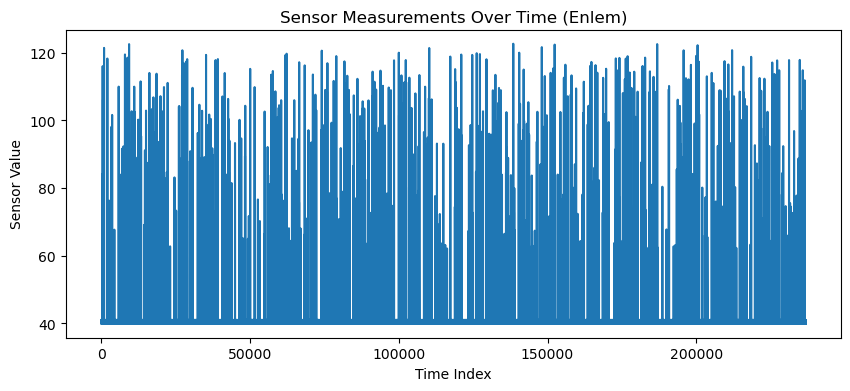

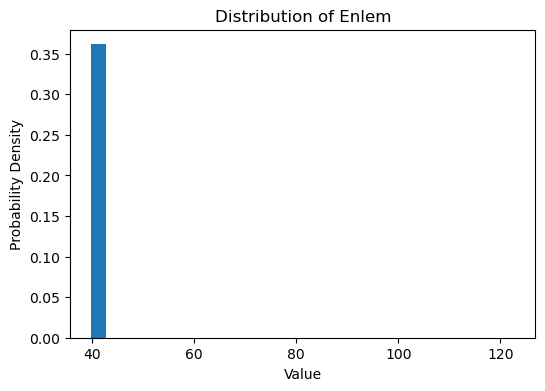

Mean Enlem: 40.683
Standard Deviation: 2.896
95% Confidence Interval: (40.671404760420096, 40.69473209945625)
Shapiro-Wilk Test p-value: 1.0941920614387338e-30


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv("C:/Users/pc/.cache/kagglehub/datasets/emirhanakku/synthetic-smart-city-infrastructure-sensor-data/versions/1/smart_city_sensor_data.csv")

# Inspect columns
print(df.columns)

# Example: choose ONE sensor variable (adjust name if needed)
# Common names might be: temperature, humidity, air_quality, noise_level
sensor_column = df.select_dtypes(include=['float64', 'int64']).columns[0]

data = df[sensor_column].dropna()

# -----------------------------
# 1. Time-series visualization
# -----------------------------
plt.figure(figsize=(10,4))
plt.plot(data.values)
plt.title(f"Sensor Measurements Over Time ({sensor_column})")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value")
plt.show()

# -----------------------------
# 2. Distribution of sensor noise
# -----------------------------
plt.figure(figsize=(6,4))
plt.hist(data, bins=30, density=True)
plt.title(f"Distribution of {sensor_column}")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

# -----------------------------
# 3. Statistical analysis
# -----------------------------
mean_value = np.mean(data)
std_value = np.std(data)

ci_95 = stats.norm.interval(
    0.95,
    loc=mean_value,
    scale=std_value / np.sqrt(len(data))
)

print(f"Mean {sensor_column}: {mean_value:.3f}")
print(f"Standard Deviation: {std_value:.3f}")
print(f"95% Confidence Interval: {ci_95}")

# -----------------------------
# 4. Normality test (optional but strong)
# -----------------------------
stat, p_value = stats.shapiro(data.sample(500, random_state=42))

print("Shapiro-Wilk Test p-value:", p_value)
